<a href="https://colab.research.google.com/github/vijaygwu/MathematicsOfML/blob/main/GradDecent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding Gradient Descent: A Practical Introduction

Gradient descent is one of the most fundamental optimization algorithms in machine learning and deep learning. Think of it as trying to find the lowest point in a valley by taking small steps downhill. In mathematical terms, it's a method for finding the minimum of a function by iteratively moving in the direction of steepest descent.

## The Basic Concept

Imagine you're standing on a hilly landscape and your goal is to reach the lowest point (valley). You would:
1. Look around to see which direction leads downhill (finding the gradient)
2. Take a step in that direction (applying the learning rate)
3. Repeat until you reach the bottom (convergence)

This is exactly how gradient descent works in mathematics:
- The "landscape" is your loss function (in our code: `x² + 2y²`)
- The "direction" is determined by the gradient (slope) of this function
- The "step size" is controlled by the learning rate

## Understanding the Code Implementation

Let's break down the key components of our implementation:

### 1. The Loss Function
```python
def loss_function(x, y):
    return x**2 + 2*y**2
```
This creates our "landscape" - a bowl-shaped surface where:
- The minimum (lowest point) is at (0,0)
- The loss increases quadratically as we move away from the minimum
- The surface is steeper in the y direction (due to the coefficient 2)

### 2. The Gradient Function
```python
def gradient(x, y):
    dx = 2*x
    dy = 4*y
    return np.array([dx, dy])
```
This calculates the "direction of steepest descent" by:
- Computing partial derivatives with respect to x and y
- Returning a vector pointing in the direction of steepest increase
- The negative of this vector gives us the direction to move downhill

### 3. The Gradient Descent Algorithm
```python
def gradient_descent(learning_rate=0.1, n_iterations=20):
    current_pos = np.array([1.5, 1.5])  # Starting point
    
    for i in range(n_iterations):
        grad = gradient(current_pos[0], current_pos[1])
        current_pos = current_pos - learning_rate * grad
```
This implements the actual optimization by:
- Starting from an initial position (1.5, 1.5)
- Computing the gradient at the current position
- Taking a step in the opposite direction of the gradient
- The step size is controlled by the learning rate (0.1 in this case)

## Key Parameters and Their Effects

1. **Learning Rate (0.1)**:
   - Controls how big each step is
   - Too large: May overshoot the minimum
   - Too small: Takes too long to converge
   - Just right: Steady progress toward the minimum

2. **Number of Iterations (20)**:
   - Determines how many steps we take
   - Need enough iterations to reach the minimum
   - Too many iterations waste computational resources if we've already converged

## Visualizing the Process

Our code creates three types of visualizations:

1. **Contour Plot**: Shows the path from above
   - Contour lines represent points of equal loss
   - The path shows how we move toward the minimum
   - Useful for seeing if we're taking an efficient route

2. **3D Surface Plot**: Shows the complete loss landscape
   - Clearly shows the bowl shape of our loss function
   - Helps visualize why gradient descent works
   - Shows the actual path in three dimensions

3. **Loss vs. Iteration Plot**: Shows convergence
   - Demonstrates how quickly we're approaching the minimum
   - Should show decreasing loss values
   - Helps identify if we've reached convergence

## Applications

This simple example generalizes to many real-world applications:
- Training neural networks
- Optimizing model parameters
- Finding best-fit solutions in regression
- Minimizing error in predictions

The main difference in real applications is that:
- Loss functions are usually more complex
- There are many more dimensions (parameters) to optimize
- The landscape may have multiple local minima

## Common Challenges

1. **Local Minima**: Our example has only one minimum, but real problems often have many
2. **Saddle Points**: Points where the gradient is zero but isn't a minimum
3. **Plateau Regions**: Areas where the gradient is very small, making progress slow
4. **Choosing Parameters**: Finding the right learning rate and number of iterations


<Figure size 640x480 with 0 Axes>

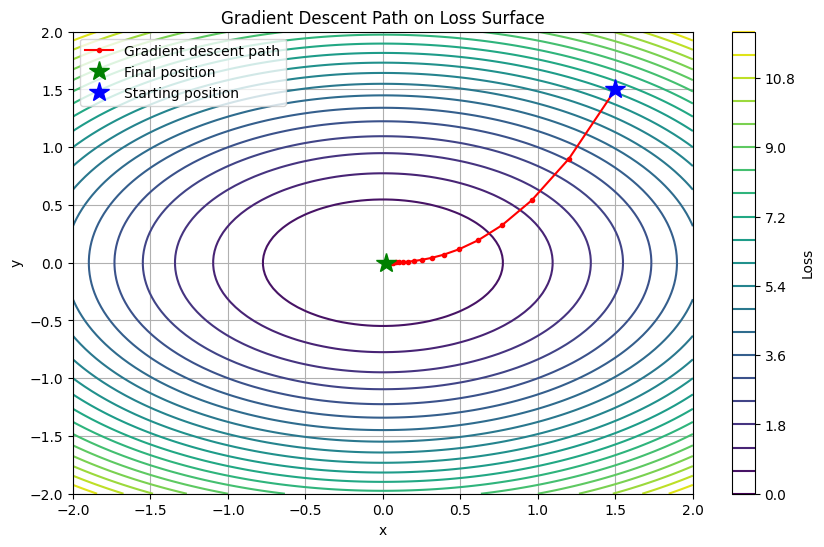

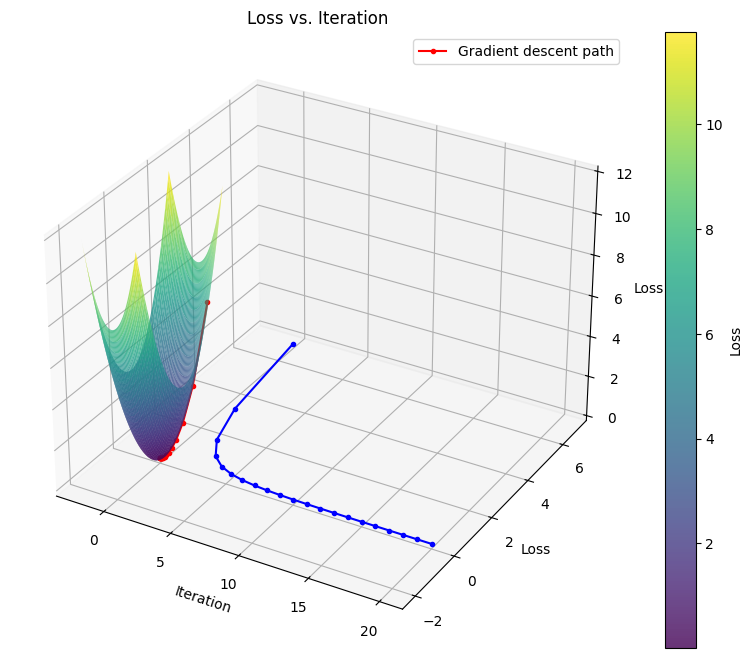

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

def plot_contour_descent(x_history, y_history, loss_history):
    """
    Creates a contour plot showing the path of gradient descent
    """
    # Create a grid of points
    x = np.linspace(-2, 2, 100)
    y = np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(x, y)

    # Calculate Z values (loss) for each point
    Z = loss_function(X, Y)

    # Create the contour plot
    plt.figure(figsize=(10, 6))
    plt.contour(X, Y, Z, levels=20)
    plt.colorbar(label='Loss')

    # Plot the gradient descent path
    plt.plot(x_history, y_history, 'r.-', label='Gradient descent path')
    plt.plot(x_history[-1], y_history[-1], 'g*', label='Final position', markersize=15)
    plt.plot(x_history[0], y_history[0], 'b*', label='Starting position', markersize=15)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Gradient Descent Path on Loss Surface')
    plt.legend()
    plt.grid(True)
    return plt

def plot_3d_surface(x_history, y_history, loss_history):
    """
    Creates a 3D surface plot showing the path of gradient descent
    """
    x = np.linspace(-2, 2, 100)
    y = np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(x, y)
    Z = loss_function(X, Y)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the surface
    surface = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
    fig.colorbar(surface, label='Loss')

    # Plot the gradient descent path
    ax.plot(x_history, y_history, loss_history, 'r.-', label='Gradient descent path')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('Loss')
    ax.set_title('3D Visualization of Gradient Descent')
    ax.legend()
    return plt

def loss_function(x, y):
    """
    Example loss function: f(x,y) = x^2 + 2y^2
    This creates a bowl-shaped surface with minimum at (0,0)
    """
    return x**2 + 2*y**2

def gradient(x, y):
    """
    Gradient of the loss function
    Returns partial derivatives [df/dx, df/dy]
    """
    dx = 2*x
    dy = 4*y
    return np.array([dx, dy])

def gradient_descent(learning_rate=0.1, n_iterations=20):
    """
    Performs gradient descent optimization
    Returns the history of positions and loss values
    """
    # Starting point
    current_pos = np.array([1.5, 1.5])

    # History for visualization
    x_history = [current_pos[0]]
    y_history = [current_pos[1]]
    loss_history = [loss_function(current_pos[0], current_pos[1])]

    # Gradient descent iterations
    for i in range(n_iterations):
        # Calculate gradient
        grad = gradient(current_pos[0], current_pos[1])

        # Update position
        current_pos = current_pos - learning_rate * grad

        # Store history
        x_history.append(current_pos[0])
        y_history.append(current_pos[1])
        loss_history.append(loss_function(current_pos[0], current_pos[1]))

    return x_history, y_history, loss_history

def create_visualizations():
    """
    Creates and saves all visualizations
    """
    # Run gradient descent
    x_history, y_history, loss_history = gradient_descent()

    # Create contour plot
    plt.figure(1)
    plot_contour_descent(x_history, y_history, loss_history)
    plt.savefig('gradient_descent_contour.png')

    # Create 3D surface plot
    plt.figure(2)
    plot_3d_surface(x_history, y_history, loss_history)
    plt.savefig('gradient_descent_3d.png')

    # Create loss vs. iteration plot
    plt.figure(3, figsize=(10, 6))
    plt.plot(range(len(loss_history)), loss_history, 'b.-')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Loss vs. Iteration')
    plt.grid(True)
    plt.savefig('loss_vs_iteration.png')

    # Show plots
    plt.show()

if __name__ == "__main__":
    create_visualizations()